# **UN SDG - NLP classification task**



### Project Overview

The 17 Sustainable Development Goals (SDGs) are a "shared blueprint for peace and prosperity for people and the planet, now and into the future". Streams of SDG-related documents produced by governments, academia, private and public entities are assessed by United Nations teams to measure such progress according to each SDG. This requires labelling to proceed to more in-depth analyses. Experts have to read the document and identify which SDGs are mentioned, or are related to it. These mapping exercises are time-consuming and subjective to personal knowledge of the links between the document contents and the SDGs. While UNEP has experts in many fields, links to the SDGs that are outside their expertise may be overlooked.
Multi-label classification will be used to solve this problem by evaluating various classification models and use one which has the best score.


***What is NLP?***
It is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Pre-processing of the datasets</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>



 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
|  Description: Importing Packages  |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

### 1.1. Data analysis Packages
To analyze the the data we will need the following packages
<ul> 
    <li><b>Numpy</b></li>
    Numpy is a packages used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.<br>
    <li><b>Pandas</b></li>
    Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.
    <li><b>Matplotlib</b></li>
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications using Python GUI toolkits such as PyQt, WxPythonotTkinter.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
    <li><b>Wordcloud</b></li>
    A wordcloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
</ul>





In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# set plot style
sns.set()

### 1.2. Data Preparation Packages
Before fitting the model to the data it is necessary to do some work on it. THe following packages will help achieve that.

<ul> 
    <li><b>stopwords</b></li>
    Decision trees regression normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes. Suppose we are doing a binary tree the algorithm first will pick a value, and split the data into two subset. For each subset, it will calculate the MSE separately.
    <li><b>tokenizer</b></li>
    A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
    <li><b>WordNetLemmatizer</b></li>
    A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.
    <li><b>CountVectorizer</b></li>
    Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. 
    <li><b>PorterStemmer</b></li>
    A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    <li><b>SVM</b></li>
    Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
</ul>

In [16]:
import nltk   #Importing nltk
from nltk.corpus import stopwords  #importing Stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from nltk.probability import FreqDist
import string

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 1.3. Data Engineering Packages


In [48]:
from sklearn.utils import resample
from nltk.util import ngrams
from imblearn.over_sampling import SMOTE 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

### 1.4. Machine Learning Packages
To analyze the data we will need the following packages
<ul> 
    <li><b>train_test_split</b></li> train_test_split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.
    <li><b>LogisticRegression</b></li> Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
    <li><b>DecisionTreeClassifier</b></li> DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
    <li><b>XGBClassifier</b></li> XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
    <li><b>CatBoostClassifier</b></li> CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone. The CatBoost library can be used to solve both classification and regression challenge.
    <li><b>VotingClassifier</b></li> A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.
</ul>

In [49]:
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB


# Model performance metric libraries
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [105]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  Description: Loading the data  |
| :--------------------------- |
| In this section we are going to load the data from the `train` and  `test` file into DataFrames. |

---

For the pupose of the model development, two datasets have been provided in two csv files
<ul>
<li><b>Train Data Set</b></li>
Training data is an extremely large dataset that is used to teach a machine learning model. Training data is used to teach prediction models that use machine learning algorithms how to extract features that are relevant to specific business goals.
<li><b>Test Data Set</b></li>
Test data is data which has been specifically identified for use in tests, typically of a computer program. Some data may be used in a confirmatory way, typically to verify that a given set of input to a given function produces some expected result.
</ul>

We will load these datasets in two data frames so we can use them for the model development. After loading the data, we will display the head of the dataset to get the first idea of the type of data we are working with.


In [50]:
#Loading the train dataset
df_train = pd.read_csv('train.csv')
df_train.head()

doi                           text_id  \
0               10.18356/5950d914-en  bf7763beb5ad7a16764d1b7fa87ab018   
1               10.18356/5950d914-en  b6415a528064b85fdde4b4c61239ed3a   
2               10.18356/31959a6d-en  29127def7e81b999b87c8e887a4fe882   
3  10.1787/eco/surveys-cze-2014-6-en  459db322b9e44630320fda76783e0f69   
4        10.1787/9789264119536-11-en  8b7d8c6c605fe9695d08ab03d601e0e9   

                                                text  sdg  labels_negative  \
0  Indicators for targets 9.b and 9.c have data a...    9                4   
1  Manufacturing value added as a percentage of G...    9                0   
2  To Share or Not to Share: That is the Question...    5                2   
3  As of 2004, parents can work without losing th...    4                2   
4  A question of considerable policy relevance is...   10                1   

   labels_positive  agreement  id  
0                5   0.111111   1  
1                3   1.000000   2  
2                7   0.555556   3  
3                2   0.000000   4  
4                4   0.600000   5

In [51]:
#Loading the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

doi                           text_id  \
0  10.1787/9789264204256-4-en  eb6faaeb2810029e3a2b9edf4b3d80e8   
1  10.1787/9789264167865-7-en  fa7fa2ce7b03d60101073df216c05713   
2        10.18356/ab2e0473-en  fa8afb153838b92b0e9d78b375689fde   
3        10.18356/faf8a648-en  e86113bf51a0aed83b8d3e3ad0bf385d   
4        10.18356/f3e7d816-en  34a60596f64e0723734228a27440a9e9   

                                                text  labels_negative  \
0  Nearly 3 out of 10 adults in these countries p...                1   
1  As urban areas become denser and rely more on ...                0   
2  Women who work outside their homes need to pro...                0   
3  The key governance bodies of this systemic res...                3   
4  In terms of policies, the change of focus from...                0   

   labels_positive  agreement  id  
0                4        0.6   1  
1                4        1.0   2  
2                9        1.0   3  
3                3        0.0   4  
4                3        1.0   5

<a id="four"></a>
# 3. Data Pre-processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
---
    
| ⚡ Description: Pre-processing of the datasets ⚡ |
| :--------------------------- |
| In this section we are going to perform thorough cleaning of the dataset. Since it is text data, we are going to use the Natural Language Processor (NLP) for this pre-process phase.

---

---

## 3.1. Train data preprocessing

In [52]:
#dropping other features aside the labelled and text feature
all_train = []
for i, row in df_train.iterrows():
    for text in row['text'].split('|||'):
        all_train.append([row['sdg'], text])
all_train = pd.DataFrame(all_train, columns=['sdg', 'text']) #dropping all other column
all_train.head()

sdg                                               text
0    9  Indicators for targets 9.b and 9.c have data a...
1    9  Manufacturing value added as a percentage of G...
2    5  To Share or Not to Share: That is the Question...
3    4  As of 2004, parents can work without losing th...
4   10  A question of considerable policy relevance is...

### 3.1.1. Noise Removal

In [53]:
#Creating a function for noise removal
def noise_removal(df, text):
    '''this function helps in the removal of noises from our dataset'''
    
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = r'url-web'
    df['text'] = df['text'].replace(to_replace = pattern_url, 
                                          value = subs_url, regex = True)
    
    return df['text']

#removing noise from the train dataset
all_train['text'] = noise_removal(all_train, text)
all_train['text']

0        Indicators for targets 9.b and 9.c have data a...
1        Manufacturing value added as a percentage of G...
2        To Share or Not to Share: That is the Question...
3        As of 2004, parents can work without losing th...
4        A question of considerable policy relevance is...
                               ...                        
25939    But, in general, such programmes neither targe...
25940    Concentration of refugees in remote camps, as ...
25941    Designating 3.8 million ha for rice production...
25942    Figure 1.1 proposes a simplified framework tha...
25943    Experience from other OECD countries has shown...
Name: text, Length: 25944, dtype: object

### 3.1.2. Punctuation and Stop-Words Removal

In [54]:
#function for removing punctuation
def remove_punctuation(text):
    """ This function is responsible for removing punctuation """
    return ''.join([j for j in text if j not in string.punctuation])

#Removing punctuation from train dataset
all_train['text'] = all_train['text'].apply(remove_punctuation)
all_train['text']

0        Indicators for targets 9b and 9c have data ava...
1        Manufacturing value added as a percentage of G...
2        To Share or Not to Share That is the Question ...
3        As of 2004 parents can work without losing the...
4        A question of considerable policy relevance is...
                               ...                        
25939    But in general such programmes neither target ...
25940    Concentration of refugees in remote camps as i...
25941    Designating 38 million ha for rice production ...
25942    Figure 11 proposes a simplified framework that...
25943    Experience from other OECD countries has shown...
Name: text, Length: 25944, dtype: object

### 3.1.3 Tokenization and Lemmatization

In [55]:
#Initialising the tokenizer and lemmatizer
tokeniser = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

#creating function for changing all text to lowercase, tokenise text, stemmatize text and lemmatise text
def pre_processor(df, text):
    ''' this function is responsible for converting our text to 
    lowercase, tokenize and also lemmatize it'''
    
    lower_case = df['text'].str.lower()                #converting text to lowercase in order to make cleaning uniform
    tokenised_tweet = lower_case.apply(lambda x: x.split())       #Tokenising the train data
    lemmatized_tweet = tokenised_tweet.apply(lambda sentence: 
                                               [lemmatizer.lemmatize(word) for word in sentence])
    return lemmatized_tweet

#converting text to lowercase, tokenizing and lemmatizing
all_train['cleaned_text'] = pre_processor(all_train, text)
all_train['cleaned_text']

#variable for cleaned tweet
cleaned_data = all_train['cleaned_text'] 
#combining the cleaned text column into single sentence for the train dataset
for i in range(len(cleaned_data)):
    cleaned_data[i] = " ".join(cleaned_data[i])
all_train['cleaned_text'] = cleaned_data
all_train['cleaned_text']

0        indicator for target 9b and 9c have data avail...
1        manufacturing value added a a percentage of gd...
2        to share or not to share that is the question ...
3        a of 2004 parent can work without losing their...
4        a question of considerable policy relevance is...
                               ...                        
25939    but in general such programme neither target n...
25940    concentration of refugee in remote camp a in k...
25941    designating 38 million ha for rice production ...
25942    figure 11 proposes a simplified framework that...
25943    experience from other oecd country ha shown th...
Name: cleaned_text, Length: 25944, dtype: object

## 3.2. Test Data Preprocessing

In [57]:
df_test['text'] = noise_removal(df_test, text) #noise removal
df_test['text'] = df_test['text'].apply(remove_punctuation) #removal of punctuation
df_test['cleaned_text'] = pre_processor(df_test, text) #tokenization and lemmatization of the text data

#assigning a variable to the cleaned_tweet dataframe
cleaned_data = df_test['cleaned_text']
#combining the cleaned message column into single sentence for the train dataset
for i in range(len(cleaned_data)):
    cleaned_data[i] = " ".join(cleaned_data[i])
df_test['cleaned_text'] = cleaned_data
df_test['cleaned_text']

0       nearly 3 out of 10 adult in these country perf...
1       a urban area become denser and rely more on pu...
2       woman who work outside their home need to proc...
3       the key governance body of this systemic respo...
4       in term of policy the change of focus from wom...
                              ...                        
6482    however their implementation highlight an impo...
6483    the drawback is that they may provide weak inc...
6484    however the pace of decline ha fallen behind t...
6485    for instance the lack of genderspecific goal i...
6486    core funding is provided by the government of ...
Name: cleaned_text, Length: 6487, dtype: object

<a id="three"></a>
# 4. Exploratory Data Analysis(EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

## 4.1. Data Statistics

### 4.1.1 The number of records and columns

In [58]:
df_train.shape

(25944, 8)

In [59]:
df_test.shape

(6487, 8)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              25944 non-null  object 
 1   text_id          25944 non-null  object 
 2   text             25944 non-null  object 
 3   sdg              25944 non-null  int64  
 4   labels_negative  25944 non-null  int64  
 5   labels_positive  25944 non-null  int64  
 6   agreement        25944 non-null  float64
 7   id               25944 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB


From these, we can see that there are no null values in our dataset. 

In [61]:
df_train.describe()

sdg  labels_negative  labels_positive     agreement  \
count  25944.000000     25944.000000     25944.000000  25944.000000   
mean       6.530373         1.549183         5.153369      0.694309   
std        3.955375         8.190231        12.324176      0.315453   
min        1.000000         0.000000         0.000000      0.000000   
25%        4.000000         0.000000         3.000000      0.333333   
50%        6.000000         1.000000         4.000000      0.777778   
75%        9.000000         2.000000         8.000000      1.000000   
max       15.000000       837.000000       925.000000      1.000000   

                 id  
count  25944.000000  
mean   12972.500000  
std     7489.532028  
min        1.000000  
25%     6486.750000  
50%    12972.500000  
75%    19458.250000  
max    25944.000000

### 4.1.2. Columns

In [28]:
df_train.columns.to_list()

['doi',
 'text_id',
 'text',
 'sdg',
 'labels_negative',
 'labels_positive',
 'agreement',
 'id']

### 4.1.3. Classes

In [29]:
df_train.sdg.unique()

array([ 9,  5,  4, 10,  3,  1, 13, 11,  2,  7,  6,  8, 15, 12, 14],
      dtype=int64)

### 4.1.4. Distribution Of Labels

In [30]:
# Checking the distribution of the SDG classes 
df_train['sdg'].value_counts()

5     3438
4     2999
7     2473
6     2247
1     2190
3     2132
2     1963
11    1798
13    1695
8     1218
14     917
9      873
10     843
15     785
12     373
Name: sdg, dtype: int64

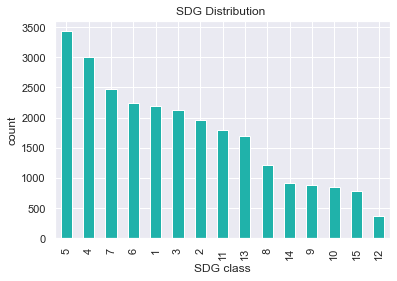

In [31]:
# graphical representaion of class distribution 
df_train['sdg'].value_counts().plot(kind = 'bar', color=['lightseagreen'])
plt.title('SDG Distribution ')
plt.xlabel('SDG class')
plt.ylabel('count')
plt.show()

### 4.2. Most Common Words

In [62]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in all_train['cleaned_text']])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

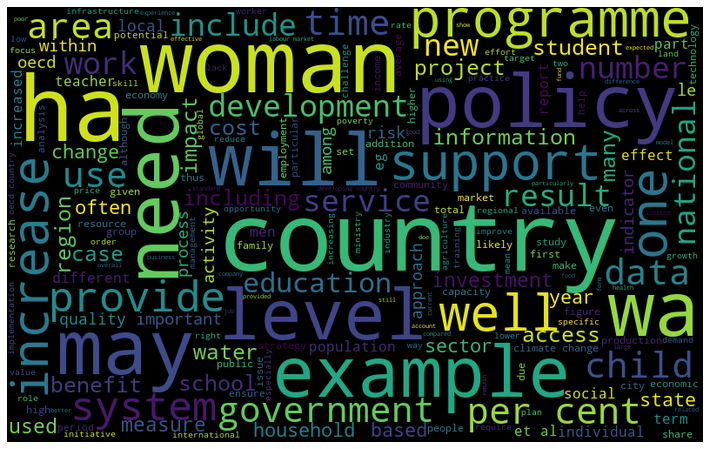

In [64]:
# Visualization of the data
#Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [65]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==1]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

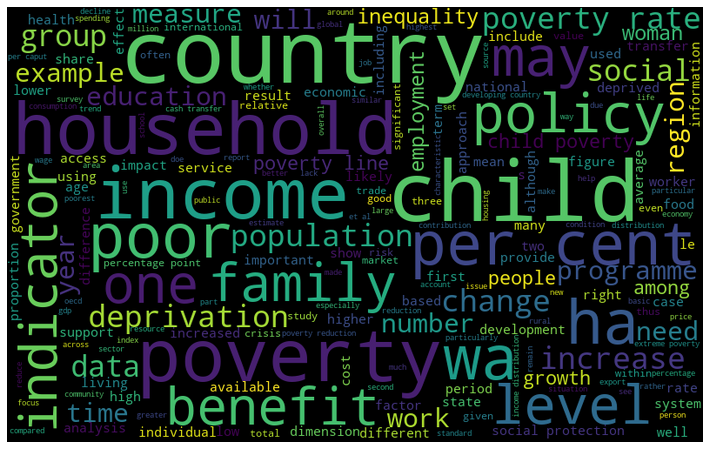

In [66]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [67]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==2]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

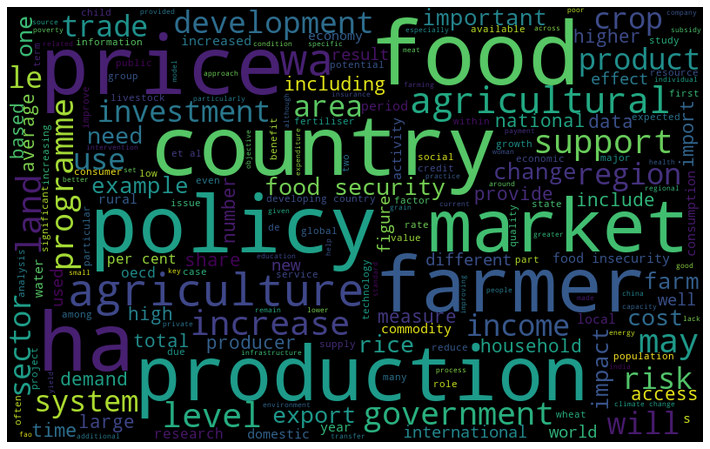

In [68]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [69]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==3]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

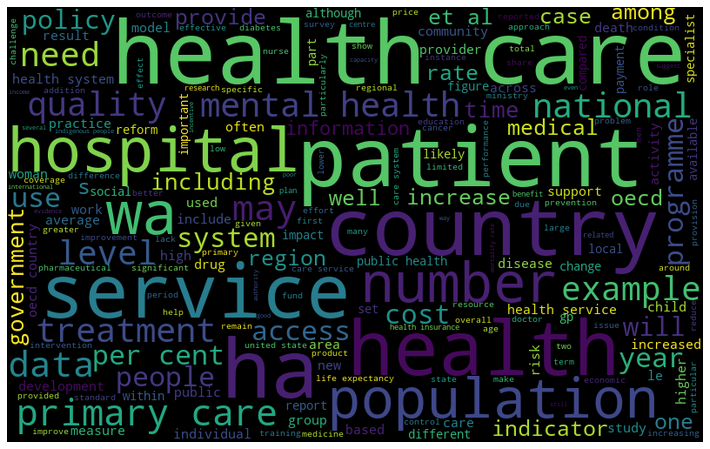

In [70]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [71]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==4]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

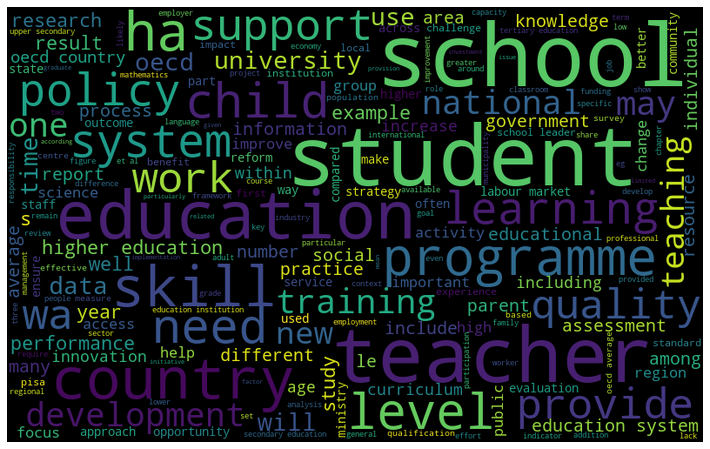

In [72]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [73]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==5]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

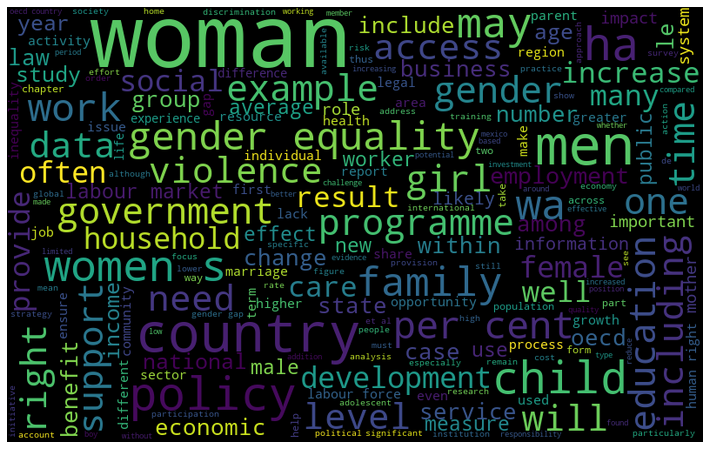

In [74]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [75]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==6]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

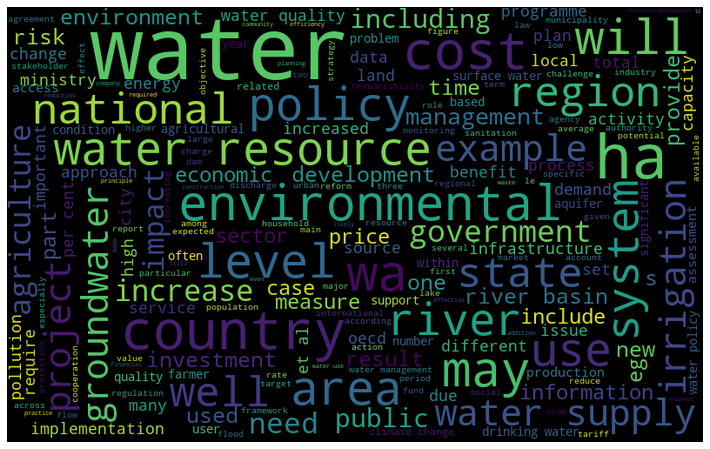

In [76]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [77]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==7]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

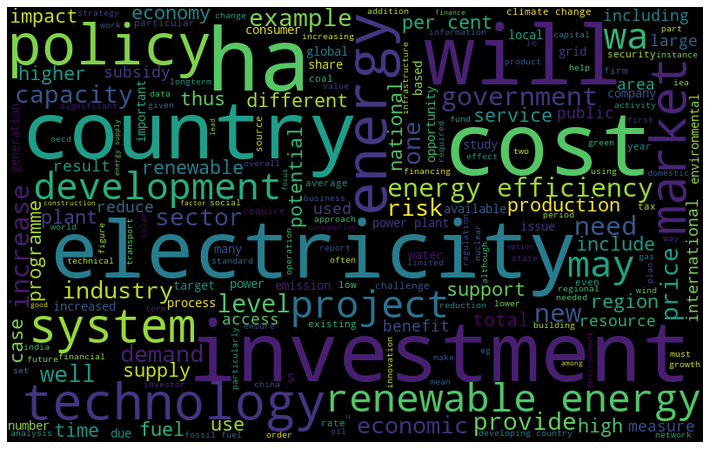

In [78]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [79]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==8]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

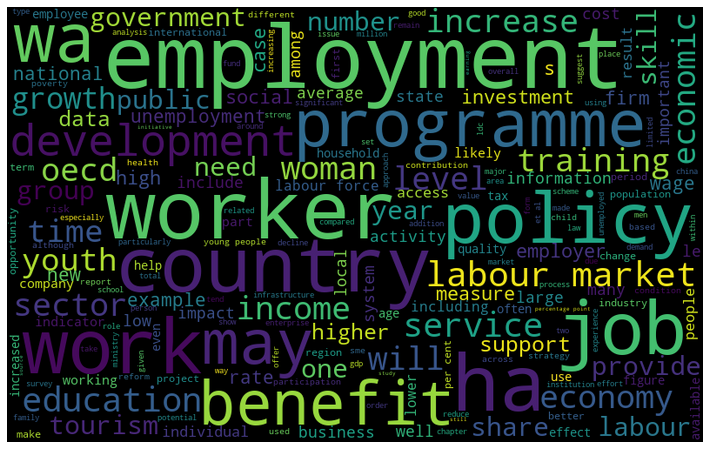

In [80]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [81]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==9]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

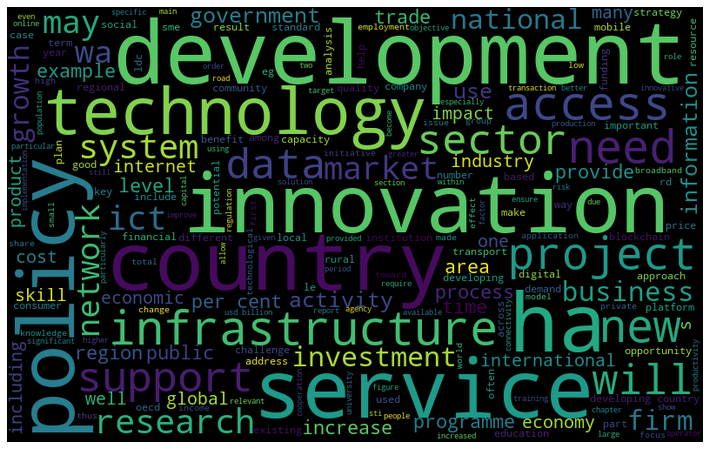

In [82]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [83]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==10]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

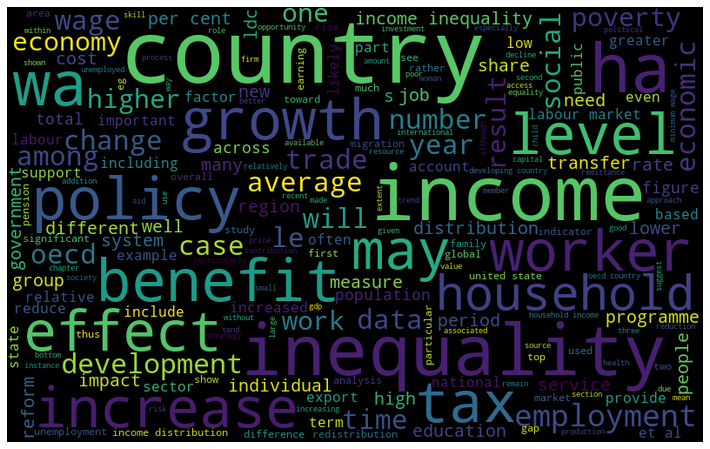

In [84]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [85]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==11]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

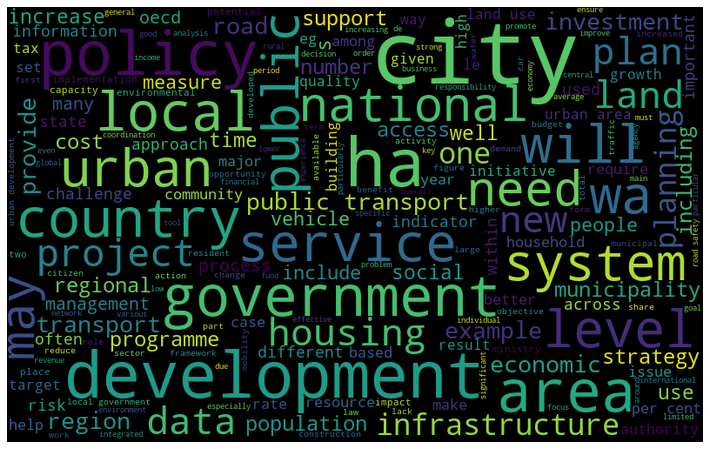

In [86]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [87]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==12]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

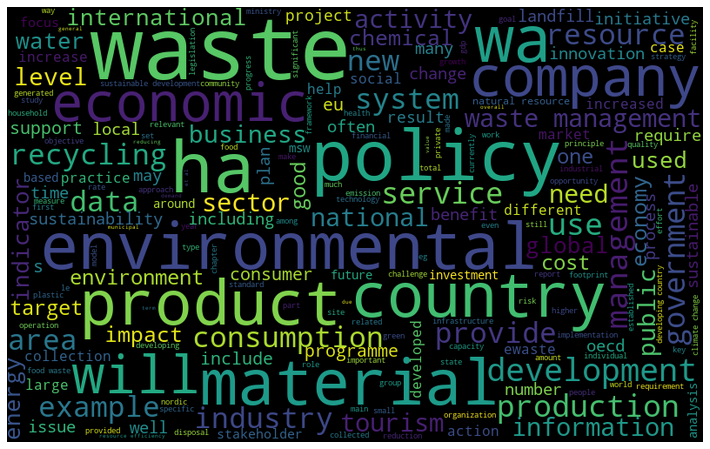

In [88]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [89]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==13]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

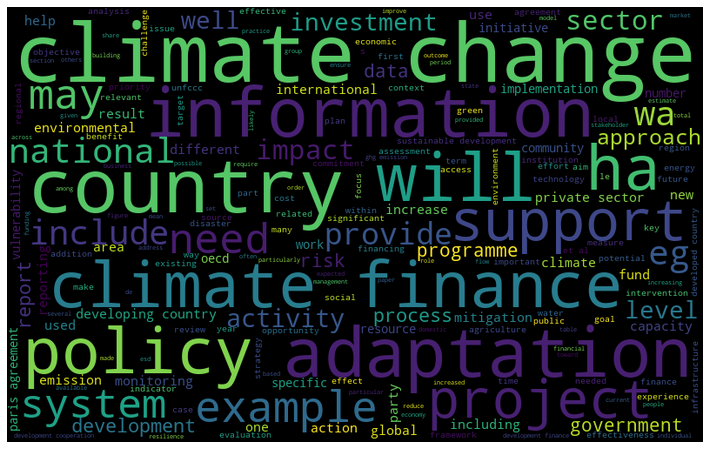

In [90]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [91]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==14]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

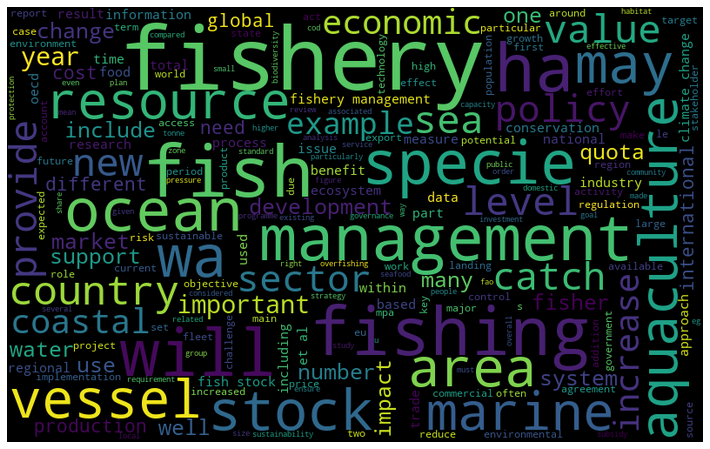

In [92]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [93]:
##for frequent words in belief of climate change
all_words = " ".join([sentence for sentence in all_train['cleaned_text'][all_train['sdg']==15]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

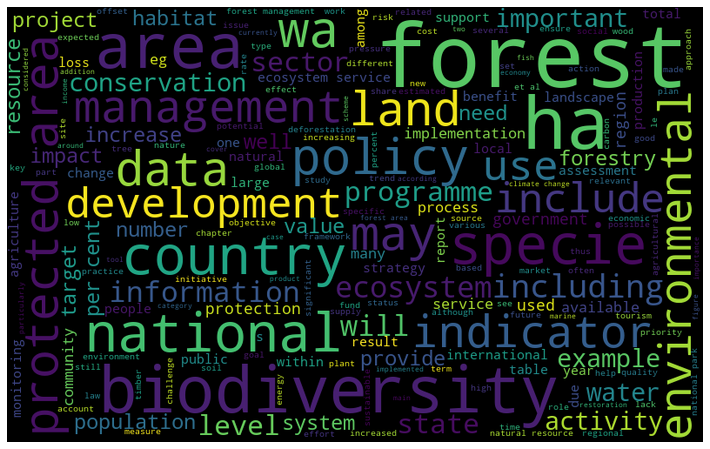

In [94]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

<a id="five"></a>
# 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [95]:
#Vectorizer for the Neural Network Model
cv = CountVectorizer(max_features= 10000, ngram_range=(1,4))
X_NN = cv.fit_transform(all_train['cleaned_text']).toarray()

#Transforming the cleaned text from the test data
real_test_NN = cv.transform(df_test['cleaned_text'])

In [96]:
#Vectorizer for the classical models
#Transforming the cleaned text from the trained data
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,4),
                     min_df=0, stop_words='english')

X = tf.fit_transform(all_train['cleaned_text'])

In [97]:
#Transforming the cleaned text from the test data
real_test = tf.transform(df_test['cleaned_text'])

In [98]:
#assigning a variable to our label
y = all_train['sdg']

In [99]:
#count of the classes in the label
y.value_counts()

5     3438
4     2999
7     2473
6     2247
1     2190
3     2132
2     1963
11    1798
13    1695
8     1218
14     917
9      873
10     843
15     785
12     373
Name: sdg, dtype: int64

In [100]:
#using SMOTE for upsampling our classes
smt = SMOTE(random_state = 1, k_neighbors = 1)

In [101]:
#fitting X and y variable to the SMOTE
X,y = smt.fit_resample(X, y)

In [102]:
#count of the classes in the label
y.value_counts()

1     3438
2     3438
3     3438
4     3438
5     3438
6     3438
7     3438
8     3438
9     3438
10    3438
11    3438
12    3438
13    3438
14    3438
15    3438
Name: sdg, dtype: int64

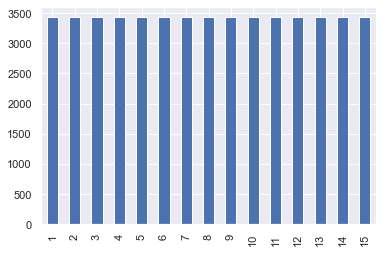

In [103]:
y.value_counts().plot(kind = 'bar')
plt.show()

<a id="six"></a>
# 6. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [104]:
#train-test split for the classical models
x_train, x_test, y_train, y_test = train_test_split(X, y, 
random_state = 0, test_size = 0.20)

### LOGISTIC REGRESSION

In [ ]:
#Model training using logistic regression
model = LogisticRegression(multi_class='ovr')
model.fit(x_train, y_train)

In [ ]:
#Training the model
pred = model.predict(x_test)

In [ ]:
#Predicting the unseen data
model.fit(X, y)
pred_test = model.predict(real_test)

In [ ]:
#result of the prediction
result_model = pd.DataFrame(pred_test, columns= ['sdg'])
result_model.head(20)

In [ ]:
#creating submission file for kaggle upload
output = pd.DataFrame({"id":df_test['id']})
submission = output.join(result_model)
submission.to_csv("submission.csv", index = False)

## MULTINOMIAL NAIVE BAYES

In [106]:
#Instantiating the MNB Model
model2 = MultinomialNB(alpha = 0.01, class_prior = None, fit_prior = True)
model2.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [107]:
#Training the model
pred2 = model2.predict(x_test)

In [109]:
#Predicting the unseen data
model2.fit(X, y)
pred_test2 = model2.predict(real_test)

In [110]:
#result of the prediction
result2 = pd.DataFrame(pred_test2, columns= ['sdg'])
result2.head(20)

sdg
0     4
1    11
2     5
3     7
4     5
5     5
6     8
7     4
8     5
9     8
10    2
11   11
12    3
13    3
14    5
15    6
16    5
17    1
18    5
19    1

In [111]:
#creating submission file for kaggle upload
output = pd.DataFrame({"id":df_test['id']})
submission = output.join(result2)
submission.to_csv("submission2.csv", index = False)

## LINEAR SUPPORT VECTOR MACHINE 

In [ ]:
#Instantiating the SVC model
clf_1 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
clf_1.fit(x_train, y_train)

In [ ]:
#Training the model
svc_pred1 = clf_1.predict(x_test)

In [ ]:
#predicting sentiments for the unseen test dataset
clf_1.fit(X,y)
svc_pred_test1 = clf_1.predict(bow_test)

In [ ]:
#result of the prediction
result_svc1 = pd.DataFrame(svc_pred_test1, columns= ['sdg'])
result_svc1.head(20)

In [ ]:
#creating submission file for kaggle upload
output = pd.DataFrame({"id":df_test['id']})
submission = output.join(result_svc1)
submission.to_csv("svc1.csv", index = False)

## BALANCED RANDOM FOREST MODEL

In [ ]:
#Build SRF model
BRFC = BalancedRandomForestClassifier (n_estimators=150, random_state=2)
BRFC.fit(x_train, y_train)

In [ ]:
#BRFC model training
y_pred = BRFC.predict(x_test)

In [ ]:
#predicting sentiments for the unseen test dataset
BRFC.fit(X,y)
y_pred_test = BRFC.predict(real_test)

In [ ]:
#result of the prediction
result_BRFC = pd.DataFrame(y_pred_test, columns= ['sdg'])
result_BRFC.head(20)

In [ ]:
#creating submission file for kaggle upload
output = pd.DataFrame({"id":df_test['id']})
submission = output.join(result_BRFC)
submission.to_csv("BRFC.csv", index = False)

### NEURAL NETWORK

In [ ]:
#train-test split for the neural network models
xnn_train, xnn_test, ynn_train, ynn_test = train_test_split(X_NN, y, 
random_state = 0, test_size = 0.20)

In [ ]:
#Instantiating the network
model = Sequential()
model.add(Dense(100, input_dim=X_NN.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(16,activation='softmax', kernel_initializer='random_normal'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics =['accuracy'])

In [ ]:
model.fit(xnn_train,ynn_train, epochs=5)

In [ ]:
#testing
NN_pred = model.predict(xnn_test)

In [ ]:
#predicting sentiments for the unseen test dataset
model.fit(X_NN,y)
NN_test_pred = model.predict(real_test_NN)

In [ ]:
NN_test_pred

In [ ]:
classes_x=np.argmax(NN_test_pred,axis=1)
classes_x

In [ ]:
#result of the prediction
result_NN = pd.DataFrame(classes_x, columns= ['sdg'])
result_NN.head(20)

In [ ]:
#creating submission file for kaggle upload
output = pd.DataFrame({"id":df_test['id']})
submission = output.join(result_NN)
submission.to_csv("NN.csv", index = False)

<a id="seven"></a>
# 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [ ]:
#Creating function for checking model performance
def get_class_report(y_test, y_predict):
    '''function for carrying out classification report'''
    
    accuracy = classification_report(y_test, y_predict)
    return accuracy

In [ ]:
#Checking Logistics Regression model performance
print(get_class_report(y_test, pred))

In [ ]:
#Checking  Multinomial Naive Bayes model performance
print(get_class_report(y_test, pred2))

In [ ]:
#Checking BRFC model performance
print(get_class_report(y_test, y_pred))

In [ ]:
#Checking SVC  model performance
print(get_class_report(y_test, svc_pred1))

<a id="eight"></a>
# 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Multinomial Naive Bayes model performed best because it performed best on both the trained and unseen test dataset unlike the other model that had problem of overfitting.

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

Naive Bayes is a powerful algorithm that is used for text data analysis and with problems with multiple classes. To understand Naive Bayes theorem’s working, it is important to understand the Bayes theorem concept first as it is based on the latter.
Bayes theorem, formulated by Thomas Bayes, calculates the probability of an event occurring based on the prior knowledge of conditions related to an event. 


<a id="nine"></a>
# 9.  Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In this task, we were able to get insight into the data we are dealing with and after discovering it is a text dataset, we decided to clean the dataset with the use of Natural Language Processor(NLP) in order for the dataset to be ready for training. Both the train and test dataset went throgh the same phases of cleaning. 

After cleaning, the dataset(text column) which was in text was transformed to numerical data with the help of a term frequency–inverse document frequency vectoriser for the classical models and a count vectoriser for the neural network. For the neural network, the count vectoriser was set at maximum features of 10000 in order to feed our model a concise number of features for faster and accurate training and prediction. The sdg feature which is the labelled feature was also oversampled(balanced) due to the original data being imbalanced.

After the preprocess and data engineering phase, different models were tried, the models performances were checked with the use of classification report for the classical models and log loss for the neural network. The Multinomial Naive Bayes Model emerged as the best model in terms of prediction, accuracy and time.

In conclusion, we believe that to further improve the predictive power of our model, the train dataset needs to be well scrutinized in terms of the labels attached to the observations. Unfortunately, The agreement score could not help us much to do this. 

<a id="ten"></a>
# 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

### 1. https://www.upgrad.com/blog/multinomial-naive-bayes-explained/#:~:text=The%20algorithm%20is%20based%20on,the%20highest%20probability%20as%20output.
### 2. https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
### 3. https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/